In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df.shape

(38765, 3)

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.Member_number.nunique()

3898

In [5]:
df.itemDescription.nunique()

167

In [6]:
df.Date.nunique()

728

In [7]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

In [9]:
basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [10]:
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [11]:
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
whole_milk_df = basket.loc[basket['whole milk']==1]

In [13]:
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)

In [14]:
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [15]:
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
2,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
4,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
8,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
9,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954


In [16]:
def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [17]:
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'bottled beer'}), frozenset({'salty snack'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [18]:
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'chewing gum'}), frozenset({'beef'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

In [19]:
df[df['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


In [20]:
support=whole_milk_rules.support.values
confidence=whole_milk_rules.confidence.values

In [21]:
import networkx as nx

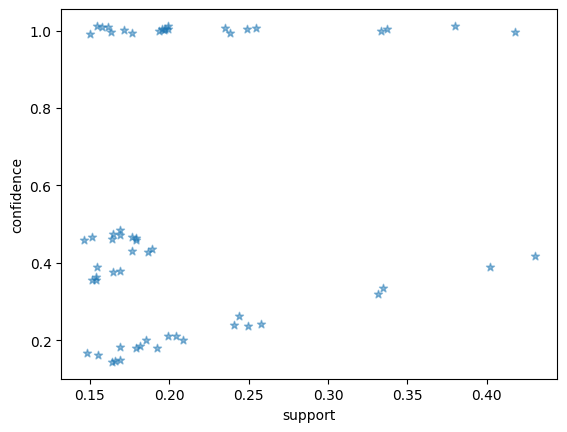

In [22]:
import random
import matplotlib.pyplot as plt

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()